In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('food_consumption.csv')
df

,country,food_category,consumption,co2_emission
0,Argentina,pork,10.51,37.20
1,Argentina,poultry,38.66,41.53
2,Argentina,beef,55.48,1712.00
3,Argentina,lamb_goat,1.56,54.63
4,Argentina,fish,4.36,6.96
...,...,...,...,...
1425,Bangladesh,dairy,21.91,31.21
1426,Bangladesh,wheat,17.47,3.33
1427,Bangladesh,rice,171.73,219.76
1428,Bangladesh,soybeans,0.61,0.27


In [10]:
co2_emission = df['co2_emission']
co2_emission.describe()

count    1430.000000
mean       74.383993
std       152.098566
min         0.000000
25%         5.210000
50%        16.530000
75%        62.597500
max      1712.000000
Name: co2_emission, dtype: float64

### Plot Histogram of co2 emission.

count    1430.000000
mean       74.383993
std       152.098566
min         0.000000
25%         5.210000
50%        16.530000
75%        62.597500
max      1712.000000
Name: co2_emission, dtype: float64


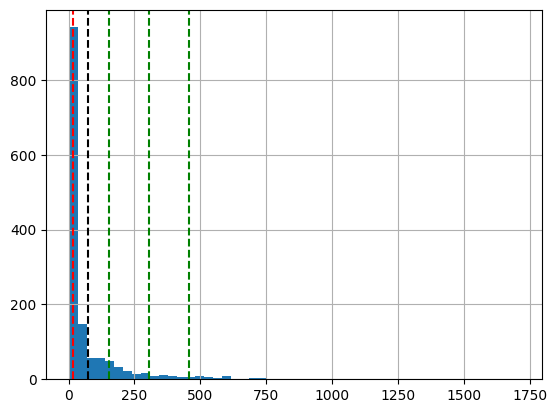

In [11]:
hist = co2_emission.hist(bins=50)
print(co2_emission.describe())
# draw vertical line at mean
plt.axvline(co2_emission.mean(), color='k', linestyle='dashed')
plt.axvline(co2_emission.median(), color='r', linestyle='dashed')
plt.axvline(co2_emission.std(), color='g', linestyle='dashed')
plt.axvline(co2_emission.std() * 2, color='g', linestyle='dashed')
plt.axvline(co2_emission.std() * 3, color='g', linestyle='dashed')

plt.show()

## show var and std

In [12]:
df.groupby('food_category')['co2_emission'].sum()



food_category
beef         48633.26
dairy        23290.00
eggs           974.95
fish          3588.22
lamb_goat    11837.38
nuts           951.99
pork          7419.11
poultry       2963.16
rice          4886.91
soybeans        50.35
wheat         1773.78
Name: co2_emission, dtype: float64

In [13]:
food_consumption = df
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

print(emissions_by_country < lower)

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Albania      False
Algeria      False
Angola       False
Argentina    False
Armenia      False
             ...  
Uruguay      False
Venezuela    False
Vietnam      False
Zambia       False
Zimbabwe     False
Name: co2_emission, Length: 130, dtype: bool
country
Argentina    2172.4
Name: co2_emission, dtype: float64
